# 1. 파이차트 코드

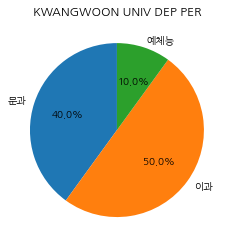

In [4]:
import matplotlib.pyplot as plt

# 학과 비율 데이터 : 이 데이터는 직접 분석 필요..
labels = ['문과', '이과', '예체능']
sizes = [40, 50, 10]  # 학과 비율

# 파이차트 생성
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.rcParams['font.family'] = 'NanumGothic'

# 차트 제목
plt.title('KWANGWOON UNIV DEP PER')

# 차트 출력
plt.show()


# 2. 성취도 다이어그램 코드

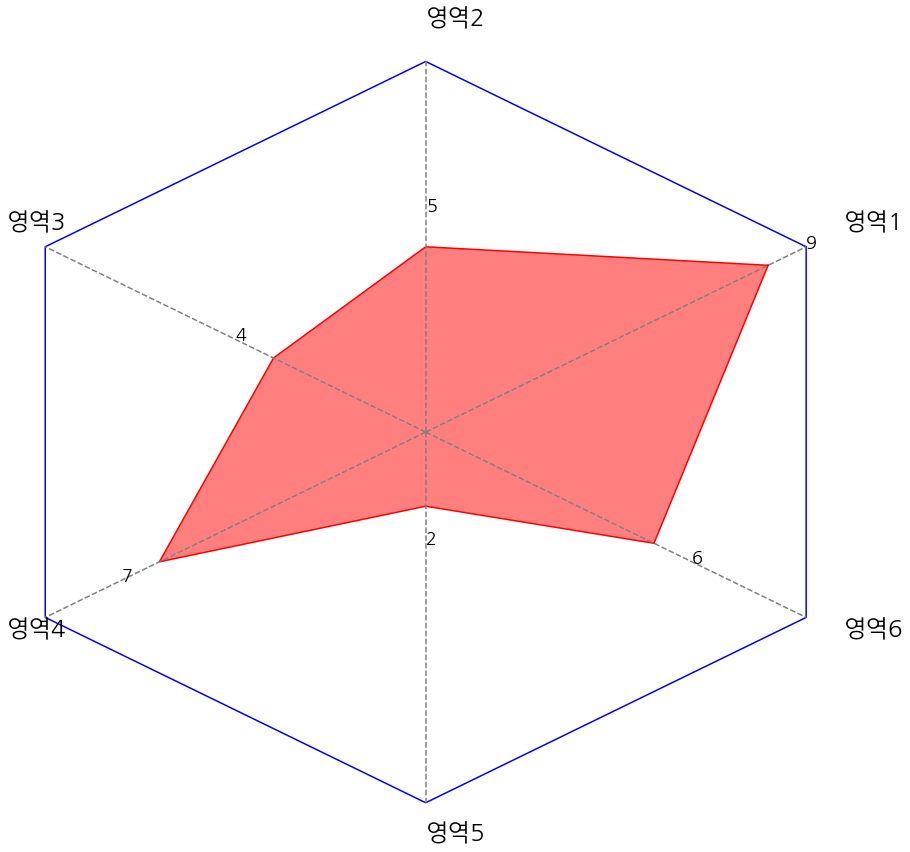

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 제곱근
def sqrt(inp):
    result = inp/2
    for i in range(30):
        result = (result + (inp / result)) / 2
    return result

# 좌표 계산
# 마지막에는 처음의 좌표를 한번 더 넣어 그림을 그릴때 끝 부분을 이어지게 함
def honeycomb_list(inp):
    result_x = []
    result_y = []
    for i in range(6):
        theta = (2 * np.pi / 6) * (i + 1) - (2 * np.pi / 6) / 2
        result_x.append(inp[i] * np.cos(theta))
        result_y.append(inp[i] * np.sin(theta))
    theta = (2 * np.pi / 6) * (0 + 1) - (2 * np.pi / 6) / 2
    result_x.append(inp[0] * np.cos(theta))
    result_y.append(inp[0] * np.sin(theta))    
    return result_x, result_y

# 그래프
# 인풋값으로 점수의 최고값과 점수 리스트를 받음
# 각 리스트에 +1 씩 더한 더미 리스트를 만들어 점수 및 문자를 쓰도록 구현

# inp1 : 최고점
# inp2 : 점수 리스트
def honeycomb_graph(inp1, inp2):
    max_list = np.zeros(6) + inp1
    max_x, max_y = honeycomb_list(max_list)
    x, y = honeycomb_list(inp2)
    
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 15)
    fig.patch.set_visible(False)
    ax.axis('off')
    plt.rcParams['font.family'] = 'NanumGothic'
    
    # 바깥쪽 그래프
    plt.plot(max_x, max_y, 'b')
    
    # 안쪽 그래프
    plt.plot(x, y, 'r')
    
    # 색 채우기
    plt.fill_between(x, y, 0, facecolor="red", alpha=0.5)
    
    # 점수쓰기
    score_list = np.array(inp2) + 1
    score_x, score_y = honeycomb_list(score_list)
    
    # 글자쓰기
    text = ['영역1', '영역2', '영역3', '영역4', '영역5', '영역6']
    text_x, text_y = honeycomb_list(max_list + 1)
    
    for i in range(6):
        # 점수
        plt.text(score_x[i], score_y[i], inp2[i], fontsize = 18)
        # 점선
        plt.plot([0, max_x[i]], [0, max_y[i]], linestyle = '--', color = 'gray')
        # 글자
        plt.text(text_x[i], text_y[i], text[i], fontsize = 24)
        
        
data = [9, 5, 4, 7, 2, 6]
honeycomb_graph(10, data)

# + 크롤링 하기 힘들면 저번에 제가 진행한 네이버 도서 API 가능

In [7]:
import requests

# 제가 developer naver에서 애플리케이션 신청해서 발급받은 id랑 secret입니다
client_id = "ytu1QrmhBUW2cRtPWOCr"
client_secret = "Ub_7OhOEIy"

# 검색할 책 제목
book = "파친코 1: 이민진 장편소설"
# books = ["검색할 도서 제목1", "검색할 도서 제목2", "검색할 도서 제목3"] 리스트 형태로 넣으면 여러 개 검색 가능

url = "https://openapi.naver.com/v1/search/book.json"

headers = {
    "X-Naver-Client-Id": client_id,
    "X-Naver-Client-Secret": client_secret
}
params = {
    "query": book,
    "display": 10  # 검색 결과 출력 건수 (MAX 100)
}

response = requests.get(url, headers=headers, params=params)
data = response.json()

# 검색 결과 확인/출력
if "items" in data:
    for item in data["items"]:
        title = item["title"]
        author = item["author"]
        publisher = item["publisher"]
        description = item["description"]
        toc = item.get("toc", "")  # 목차 정보
        reviews = item.get("reviews", [])  # 추천사 정보
        
        print(f"도서 제목: {title}\n저자: {author}\n출판사: {publisher}")
        print(f"도서 소개: {description}")
        print(f"목차: {toc}")
        print("추천사:")
        for review in reviews:
            print(review)
        print()
        
        print()

else:
    print("검색 결과가 없습니다.")


도서 제목: 파친코 1 (이민진 장편소설)
저자: 이민진
출판사: 인플루엔셜
도서 소개: “역사는 우리를 저버렸지만, 그래도 상관없다”
역사에 외면당한 재일조선인 가족의 대서사극
전 세계를 감동시킨 이민진 작가 화제작 《파친코》 새롭게 출간!

“내게 ‘한국인’은 이야기의 주인공이 될 가치가 있는 이들이다.
나는 가능한 한 오래 한국인 이야기를 쓰고 싶다.” 
- ‘한국 독자들에게’ 중에서

4대에 걸친 재일조선인 가족의 이야기를 그린 세계적 베스트셀러, 이민진 작가의 장편소설 《파친코》가 새롭게 출간되었다. 《파친코》는 재미교포 1.5세대인 이민진 작가가 30년에 달하는 세월에 걸쳐 집필한 대하소설로, 2017년 출간되어 《뉴욕타임스》 베스트셀러에 올랐다. 현재까지 전 세계 33개국에 번역 수출되었으며, BBC, 아마존 등 75개 이상의 주요 매체의 ‘올해의 책’으로 선정되었을 뿐 아니라 전미도서상 최종 후보에 이름을 올리며 평단과 대중을 모두 사로잡은 작품이다. 버락 오바마 전 미국 대통령으로부터 “회복과 연민에 대한 강력한 이야기”라는 찬사를 받으며 주목을 받았다.

지난 4월 판권 계약이 종료되며 절판되었던 《파친코》는 새로운 번역과 디자인으로 한국 독자에게 돌아왔다. 첫 문장(“역사는 우리를 저버렸지만, 그래도 상관없다”)에서부터 원문의 의미를 보다 충실하게 전달하고자 했으며, 작품 특유의 속도감 있는 문체를 살리고자 노력했다. 또한 작가가 처음 의도한 구조와 흐름을 살리기 위해 총 세 파트(1부 ‘고향’, 2부 ‘모국’, 3부 ‘파친코’)로 된 원서의 구성을 그대로 따랐다. 새 출간을 기념해 ‘한국 독자들에게’ 보내는 글에는 한국인 이야기를 계속해서 쓰는 이유를 밝혔다. 작가는 “우리가 매력적이기 때문”이라며, “한국인은 지적으로나, 감성적으로나 깊이 있는 이야기의 주인공이 될 가치가 있는 이들”이기에 앞으로도 한국의 이야기를 젊은 세대들에게 들려주고 싶다며 한국 독자들에게 각별한 애정을 표했다.
목차: 
추천사:


도서 제목: 파친코 1 (이민진